In [3]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest

In [4]:
df = pd.read_csv('data/web_data_summary.csv')

In [6]:
control = df[df['Variation']=='Control']
test = df[df['Variation']=='Test']

In [7]:
df.head(5)
# [['client_id', 'avg_step_duration', 'had_error', 'error_count', 'had_progress', 'progress_count', 'no_of_visits', 'is_confirmed', 'no_of_starts','no_of_step_1', 'no_of_step_2', 'no_of_step_3', 'no_of_confirms',
# 'step_duration_minutes']]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,progress_count,no_of_visits,is_confirmed,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms,step_duration_seconds,step_duration_minutes
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,...,4,2,True,5.0,1.0,1.0,1.0,3,226.0,3.766667
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,...,4,1,True,2.0,1.0,1.0,1.0,1,59.0,0.983333
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,...,3,2,False,2.0,1.0,1.0,1.0,0,39.0,0.650000
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,...,0,1,False,1.0,0.0,0.0,0.0,0,0.0,0.000000
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,...,0,1,False,1.0,0.0,0.0,0.0,0,0.0,0.000000


In [8]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'avg_step_duration', 'had_error', 'error_count', 'had_progress',
       'progress_count', 'no_of_visits', 'is_confirmed', 'no_of_starts',
       'no_of_step_1', 'no_of_step_2', 'no_of_step_3', 'no_of_confirms',
       'step_duration_seconds', 'step_duration_minutes'],
      dtype='object')

In [124]:
df['Variation'].value_counts()

Variation
Test       26959
Control    23526
Name: count, dtype: int64

In [291]:
df.groupby('Variation')['is_confirmed'].value_counts()

Variation  is_confirmed
Control    True            15428
           False            8098
Test       True            18682
           False            8277
Name: count, dtype: int64

## Statistics on clients

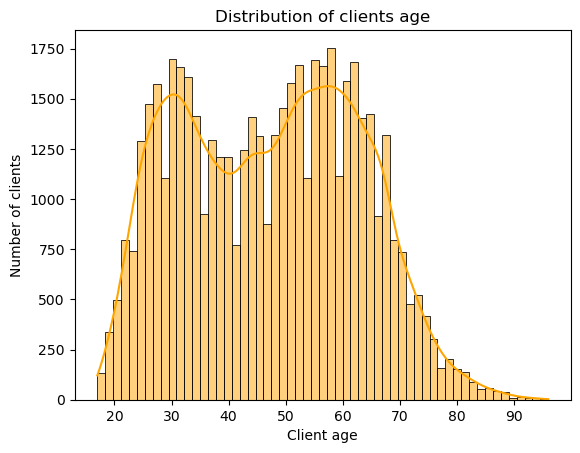

In [153]:
sns.histplot(x=df['clnt_age'], kde=True, color='orange')
plt.xlabel('Client age')
plt.ylabel('Number of clients')
plt.title('Distribution of clients age')

# Show the plot
plt.show()

In [128]:
pd.DataFrame(df['clnt_age'].describe())

,clnt_age
count,50485.000000
mean,47.320362
std,15.518599
min,17.000000
25%,33.500000
50%,48.000000
75%,59.500000
max,96.000000


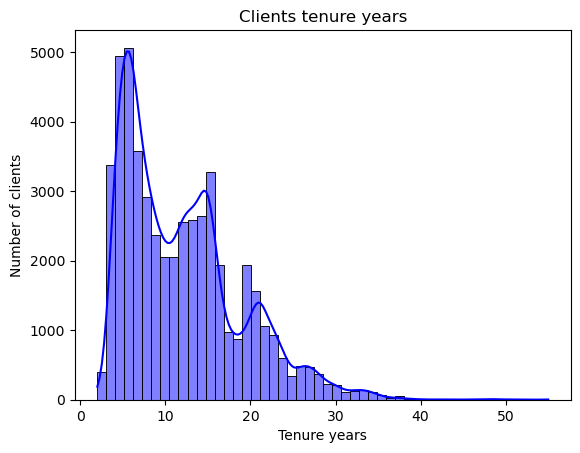

In [174]:
sns.histplot(x=df['clnt_tenure_yr'], kde=True, color='blue', bins=50)

plt.xlabel('Tenure years')
plt.ylabel('Number of clients')
plt.title('Clients tenure years')

# Show the plot
plt.show()

In [154]:
pd.DataFrame(df['clnt_tenure_yr'].describe())

,clnt_tenure_yr
count,50485.000000
mean,12.031891
std,6.860447
min,2.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,55.000000


In [200]:
round(df['gendr'].value_counts(normalize=True), 2)*100

gendr
U    34.0
M    34.0
F    32.0
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x27aa9e13490>,
 [Text(-0.9639373540021143, 0.5299290306818477, 'Male'),
  Text(0.06906960848527893, -1.0978293989430645, 'Female'),
  Text(0.9287607048079373, 0.5894094953465406, 'Unknown')],
 [Text(-0.5257840112738805, 0.28905219855373504, '34%'),
  Text(0.03767433190106123, -0.598816035787126, '34%'),
  Text(0.5065967480770566, 0.3214960883708403, '32%')])

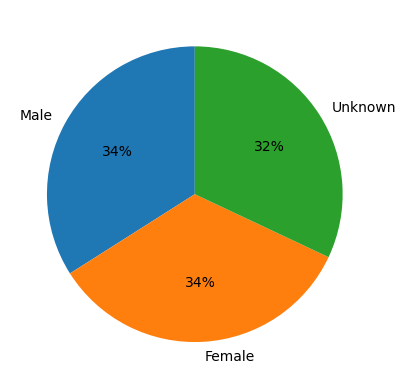

In [202]:
### sns.countplot(x=df['gendr'], color='green',saturation=0.9, width=0.6)
# # Add labels and title
# plt.xlabel('Gender')
# plt.ylabel('Number of clients')
# plt.title('Clients gender')

# # Show the plot
# plt.show()

labels = ['Male', 'Female', 'Unknown']
sizes = [34, 34, 32] 

plt.pie(sizes, labels=labels, autopct='%1.f%%', startangle=90)

In [176]:
pd.DataFrame(df['gendr'].value_counts())

,count
gendr,
U,17280
M,16947
F,16258


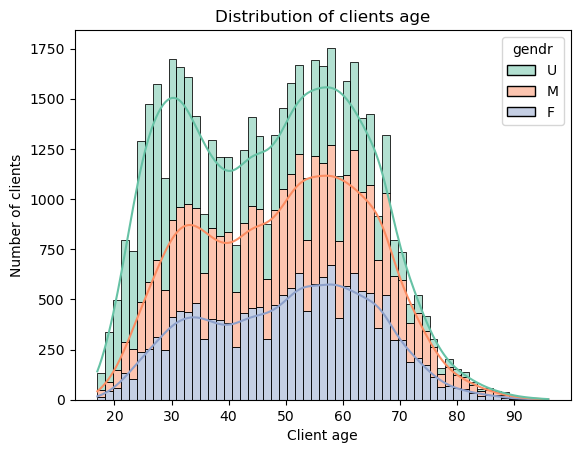

In [192]:
sns.histplot(x=df['clnt_age'], hue=df['gendr'],palette='Set2', kde=True, multiple='stack') # : {"layer", "dodge", "stack", "fill"})

plt.xlabel('Client age')
plt.ylabel('Number of clients')
plt.title('Distribution of clients age')

# Show the plot
plt.show()

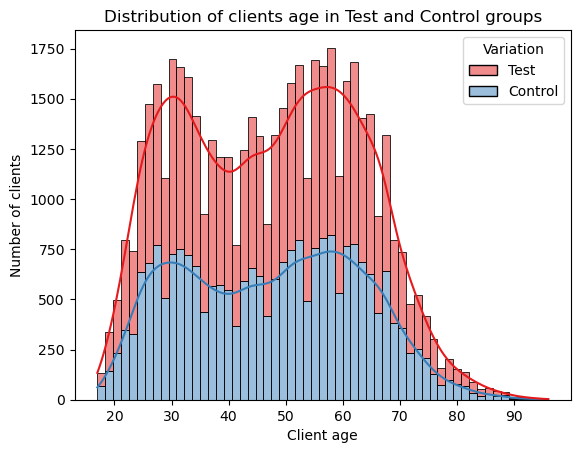

In [303]:
sns.histplot(x=df['clnt_age'], hue=df['Variation'], palette='Set1', kde=True, multiple='stack') # : {"layer", "dodge", "stack", "fill"})
# Add labels and title
plt.xlabel('Client age')
plt.ylabel('Number of clients')
plt.title('Distribution of clients age in Test and Control groups')

# Show the plot
plt.show()

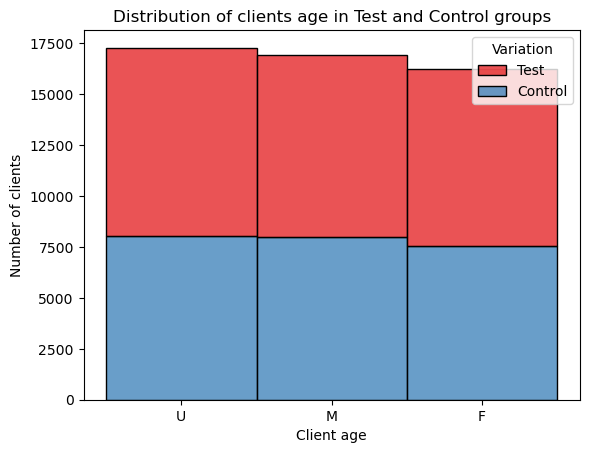

In [305]:
sns.histplot(x=df['gendr'], hue=df['Variation'],palette='Set1', multiple='stack') # : {"layer", "dodge", "stack", "fill"})
# Add labels and title
plt.xlabel('Client age')
plt.ylabel('Number of clients')
plt.title('Distribution of clients age in Test and Control groups')

# Show the plot
plt.show()

## Error rate

In [205]:
df[['had_error','error_count','no_of_visits' ]]

,had_error,error_count,no_of_visits
0,False,0,2
1,False,0,1
2,True,1,2
3,False,0,1
4,False,0,1
...,...,...,...
50480,False,0,2
50481,False,0,1
50482,False,0,3
50483,False,0,1


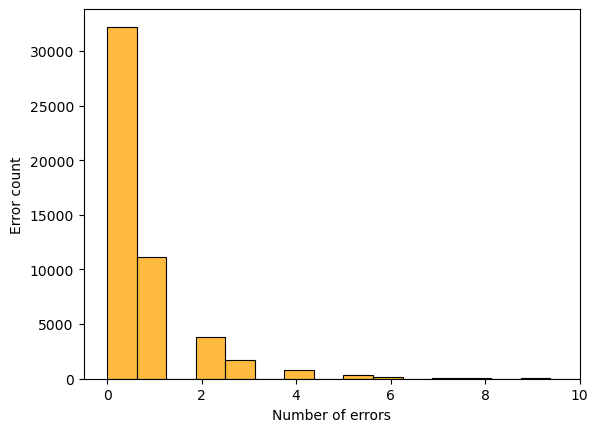

In [218]:
sns.histplot(x=df['error_count'],color='orange', bins=40)
# Add labels and title
plt.xlabel('Number of errors')
plt.ylabel('Error count')
plt.xlim(-0.5,10)
#plt.title('Distribution of clients age')

# Show the plot
plt.show()

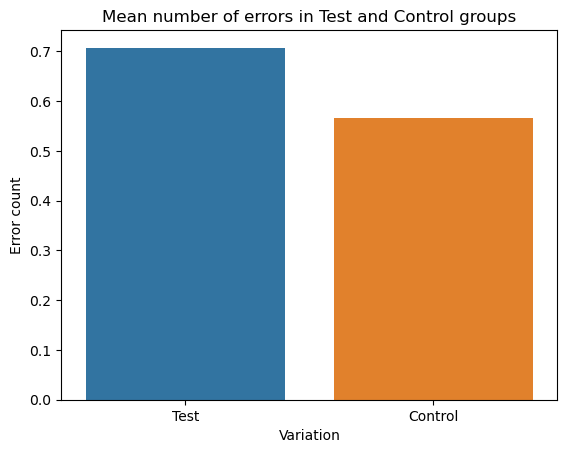

In [9]:
sns.barplot(y=df['error_count'], x=df['Variation'], estimator='mean', errorbar=None)
# Add labels and title
#plt.xlabel('Mean number of errors')
plt.ylabel('Error count')

plt.title('Mean number of errors in Test and Control groups')

# Show the plot
plt.show()

In [229]:
pd.DataFrame(df.groupby('Variation')['error_count'].sum())

,error_count
Variation,
Control,13297
Test,19065


In [239]:
totl_nr_of_steps = pd.DataFrame(df.groupby('Variation')[['no_of_starts','no_of_step_1', 'no_of_step_2', 'no_of_step_3', 'no_of_confirms']].sum())

In [249]:
suma_control = 0 
suma_test = 0 

for col in totl_nr_of_steps.columns:
    #print('Control', totl_nr_of_steps[col]['Control'])
    #print('Test', totl_nr_of_steps[col]['Test'])
    suma_control += totl_nr_of_steps[col]['Control']
    suma_test += totl_nr_of_steps[col]['Test']

suma_control, suma_test

(139996.0, 175658.0)

In [247]:
totl_nr_of_steps

,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms
Variation,,,,,
Control,45361.0,29435.0,25655.0,22377.0,17168
Test,55748.0,38569.0,30801.0,25657.0,24883


In [252]:
control_error_rate = 13297/suma_control
test_error_rate = 19065/suma_test

print('Control group:', round(control_error_rate, 2)*100)

print('Test group:', round(test_error_rate, 2)*100)

Control group: 9.0
Test group: 11.0


In [286]:
df.groupby('Variation')['is_confirmed'].sum()

Variation
Control    15428
Test       18682
Name: is_confirmed, dtype: int64

In [287]:
control_conf_rate = 15428/suma_control

test_conf_rate = 18682/suma_test


print('Control group:', round(control_conf_rate, 2)*100)

print('Test group:', round(test_conf_rate, 2)*100)

Control group: 11.0
Test group: 11.0


## Completion Rate: The proportion of users who reach the final ‘confirm’ step.

In [5]:
crosstab_corr = pd.crosstab(index=df['Variation'], columns=df['is_confirmed'])
crosstab_corr['Total_nr_of_clients'] = df['Variation'].value_counts(ascending=True)
crosstab_corr['% of_confirmed'] = round(crosstab_corr[True]/crosstab_corr['Total_nr_of_clients']*100, 2)
crosstab_corr.drop(False, axis=1, inplace=True)
crosstab_corr.columns = ['Nr_of_confirmed', 'Total_nr_of_clients', '%_of_confirmed']

In [103]:
df.groupby('Variation')['is_confirmed'].mean()

Variation
Control    0.655785
Test       0.692978
Name: is_confirmed, dtype: float64

In [91]:
crosstab_corr

,Nr_of_confirmed,Total_nr_of_clients,%_of_confirmed
Variation,,,
Control,15428,23526,65.58
Test,18682,26959,69.30


In [112]:
#completion_rate_increase = (test_completion_rate - control_completion_rate) / control_completion_rate * 100
completion_rate_increase = ((df[df['Variation']=='Test']['is_confirmed'].mean() - df[df['Variation']=='Control']['is_confirmed'].mean())/ df[df['Variation']=='Control']['is_confirmed'].mean())*100

completion_rate_increase

5.671543618559897

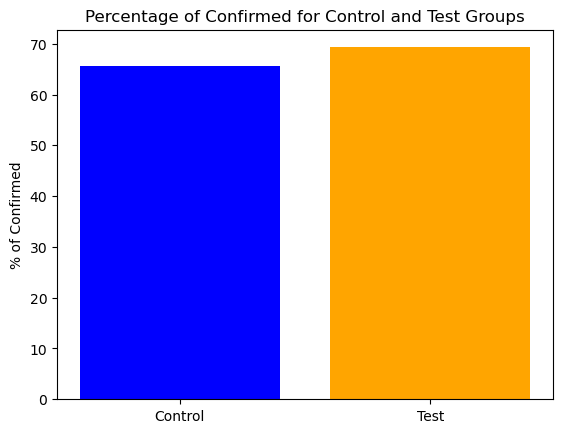

In [100]:
variation_labels = ['Control', 'Test']
percentage_confirmed = [65.58, 69.30]

# Create a bar plot
plt.bar(variation_labels, percentage_confirmed, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('')
plt.ylabel('% of Confirmed')
plt.title('Percentage of Confirmed for Control and Test Groups')

# Show the plot
plt.show()

**1. p-value test and initial statistics** 

Null hypothesis: 'Test' and 'Control' groups have the same proportion of users who reached the final 'confirm' step (no statistical difference between groups)

In [309]:
stats.ttest_ind(control['is_confirmed'], test['is_confirmed']).pvalue

5.178761560302029e-19

In [308]:
#stats.ttest_rel(control['is_confirmed'], test['is_confirmed']).pvalue

In [262]:
sm.stats.ztest(control['is_confirmed'], test['is_confirmed'])

#sm.stats.ztest(group1, group2)

(-8.911917785082291, 5.015732277977769e-19)

- p-value practically zero => we can reject null hypothesis - there is statistically significant difference between 'Test' and 'Control' groups

- 66.6% of 'Control' group and 69.3% of 'Test' group has reached the confirmation step

In [8]:
df_stats = df['is_confirmed'].astype(int).describe()
test_stats = test['is_confirmed'].astype(int).describe()
control_stats = control['is_confirmed'].astype(int).describe()

stast_summary = pd.DataFrame({'Control': control_stats, 'Test': test_stats, 'Total': df_stats })

stast_summary

,Control,Test,Total
count,23526.000000,26959.000000,50485.000000
mean,0.655785,0.692978,0.675646
std,0.475122,0.461267,0.468138
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


**1.2. Nr of confirmation per age group**

In [9]:
stats.ttest_rel(test['is_confirmed'], test['clnt_age']).pvalue

0.0

In [10]:
stats.ttest_rel(control['is_confirmed'], control['clnt_age']).pvalue

0.0

In [11]:
#Categorization of ages by bins of ages :
bin_edges = [0, 18, 25, 35, 45, 55, 65, float('inf')]
bin_labels = ['<18yrs', '18-25yrs', '25-35yrs', '35-45yrs', '45-55yrs', '55-65yrs', '>65yrs']

df['age_bin'] = pd.cut(df['clnt_age'], bins=bin_edges, labels=bin_labels, right=False)

In [12]:
#Number of confirms in each age group

age_confirms = df.groupby(['Variation', 'age_bin'])['is_confirmed'].sum().unstack(level=0) #nr of confirms
age_confirms.columns = ['Control_nr_conf', 'Test_nr_conf']

In [13]:
#Total nr of people in each age group

age_total_number = df.groupby(['Variation', 'age_bin'])['is_confirmed'].count().unstack(level=0)
age_total_number.columns = ['Control_total_nr', 'Test_total_nr']

In [14]:
# Join age_confirms and age_total_number into one table and calculate percentages

confirmations_per_age = age_confirms.join(age_total_number, on=age_confirms.index)
confirmations_per_age['%_conf_of_Control'] = round(confirmations_per_age['Control_nr_conf'] / confirmations_per_age['Control_total_nr'] *100, 2)
confirmations_per_age['%_conf_of_Test'] = round(confirmations_per_age['Test_nr_conf'] / confirmations_per_age['Test_total_nr'] *100, 2)

In [15]:
confirmations_per_age

,Control_nr_conf,Test_nr_conf,Control_total_nr,Test_total_nr,%_conf_of_Control,%_conf_of_Test
age_bin,,,,,,
<18yrs,28,34,28,34,100.00,100.00
18-25yrs,1017,1332,1484,1797,68.53,74.12
25-35yrs,3252,4097,4846,5686,67.11,72.05
35-45yrs,2666,3217,3953,4565,67.44,70.47
45-55yrs,3081,3658,4586,5296,67.18,69.07
55-65yrs,3389,3930,5112,5691,66.29,69.06
>65yrs,1995,2414,3517,3890,56.72,62.06


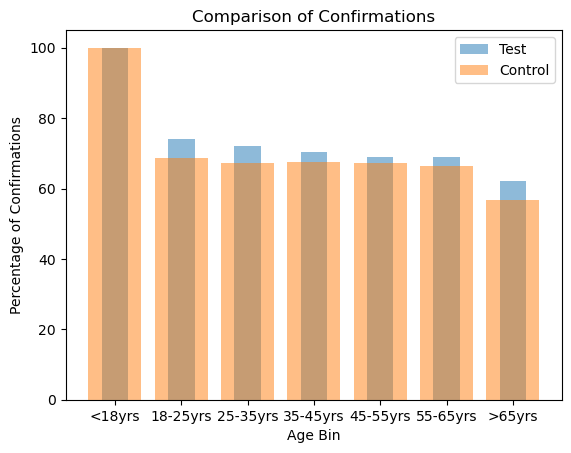

In [16]:
# Create a bar plot using Matplotlib
plt.bar(confirmations_per_age.index, confirmations_per_age['%_conf_of_Test'], label='Test', alpha=0.5, width=0.4)
plt.bar(confirmations_per_age.index, confirmations_per_age['%_conf_of_Control'], label='Control', alpha=0.5, width=0.8)


# Customize the plot
plt.title('Comparison of Confirmations')
plt.xlabel('Age Bin')
plt.ylabel('Percentage of Confirmations')
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, 'Average confirmation number')

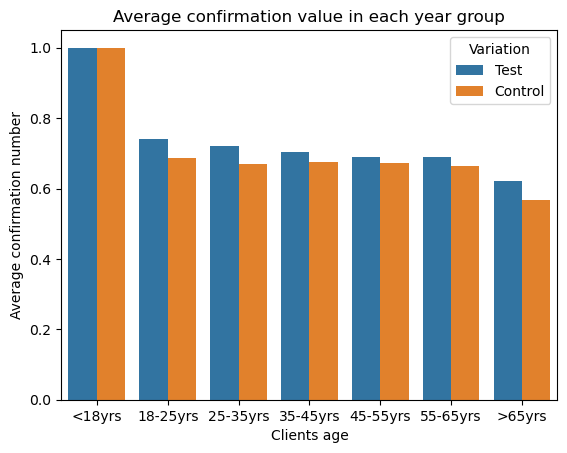

In [278]:
# Create a barplot with comparison of mean

sns.barplot(x=df['age_bin'], y=df['is_confirmed'].astype(int),  hue=df['Variation'], errorbar=None)

# Customize the plot
plt.title('Average confirmation value in each year group')
plt.xlabel('Clients age')
plt.ylabel('Average confirmation number')

**1.3. Nr of confirmation based on old/new customers**

In [18]:
stats.ttest_rel(control['is_confirmed'], control['clnt_tenure_yr']).pvalue

0.0

In [19]:
stats.ttest_rel(test['is_confirmed'], test['clnt_tenure_yr']).pvalue

0.0

In [20]:
# #Categorization of ages by bins of ages :
bin_edges_tenure = [0, 2, 5, 10, 20, 30, 40, float('inf')]
bin_labels_tenure = ['2yrs', '3-5yrs', '6-10yrs', '11-20yrs', '21-30yrs', '31-40yrs', '>41yrs']

df['tenure_yr_bin'] = pd.cut(df['clnt_tenure_yr'], bins=bin_edges_tenure, labels=bin_labels_tenure, right=True)

In [21]:
df['tenure_yr_bin'].value_counts()

tenure_yr_bin
11-20yrs    18818
6-10yrs     15974
3-5yrs       8668
21-30yrs     6249
31-40yrs      663
2yrs           61
>41yrs         52
Name: count, dtype: int64

In [22]:
# df[(df['clnt_age'] - df['clnt_tenure_yr'] < 0)]   #['clnt_tenure_yr'].value_counts()

Text(0, 0.5, 'Average confirmation number')

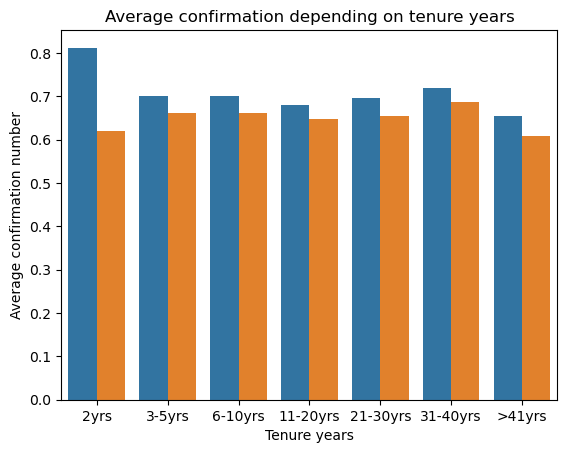

In [280]:
# Create a barplot with comparison of mean

sns.barplot(x=df['tenure_yr_bin'], y=df['is_confirmed'].astype(int),  hue=df['Variation'], errorbar=None, legend=None)

# Customize the plot
plt.title('Average confirmation depending on tenure years')
plt.xlabel('Tenure years')
plt.ylabel('Average confirmation number')

Text(0, 0.5, 'Sum of is_confirmed')

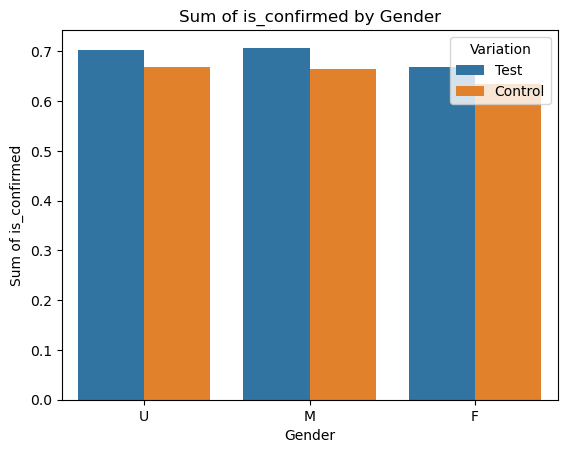

In [24]:
# Create a barplot with comparison of mean

sns.barplot(x=df['gendr'], y=df['is_confirmed'].astype(int),  hue=df['Variation'], errorbar=None)

# Customize the plot
plt.title('Sum of is_confirmed by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum of is_confirmed')

## Average Time Users Spent on Each Step

**1. p-test**

**Null hypothesis 1**: The average time users spent on each step is the same for 'Test' and 'Control' (no statistical difference between groups)

In [25]:
stats.ttest_ind(df[df['Variation']=='Test']['step_duration_minutes'], df[df['Variation']=='Control']['step_duration_minutes']).pvalue

0.027653778236822572

In [26]:
stats.ttest_ind(df[df['Variation']=='Test']['avg_step_duration'].dt.total_seconds(), df[df['Variation']=='Control']['avg_step_duration'].dt.total_seconds()).pvalue

0.027653778236823738

p-value is smaller than 0.05 between test and control groups suggesting that these groups might be different

**Null hypothesis 2**: The average time users spent on each step in 'Test' and 'Control' is the same for all age groups.

In [27]:
stats.ttest_rel(df[df['Variation']=='Test']['step_duration_minutes'], df[df['Variation']=='Test']['clnt_age'])

TtestResult(statistic=-489.8760232818256, pvalue=0.0, df=26958)

In [28]:
stats.ttest_rel(df[df['Variation']=='Control']['step_duration_minutes'], df[df['Variation']=='Control']['clnt_age'])

TtestResult(statistic=-461.73023417738835, pvalue=0.0, df=23525)

**p-value** sugest that there is correlation between average step time and age of clients

- p-value is smaller than 0.05 between test and control groups suggesting that these groups might be different

In [29]:
time_stats = df['step_duration_minutes'].describe()
test_time_stats = test['step_duration_minutes'].describe()
control_time_stats = control['step_duration_minutes'].describe()

time_stast_summary = pd.DataFrame({'Control': control_time_stats, 'Test': test_time_stats, 'Total': time_stats })

time_stast_summary

,Control,Test,Total
count,23526.000000,26959.000000,50485.000000
mean,1.185871,1.216098,1.202012
std,1.515970,1.557726,1.538467
min,0.000000,0.000000,0.000000
25%,0.483333,0.504167,0.494444
50%,0.847049,0.825000,0.833333
75%,1.437500,1.404167,1.419444
max,63.597222,65.883333,65.883333


In [30]:
pd.DataFrame(df['step_duration_minutes'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.]))

,step_duration_minutes
0.10,0.200000
0.20,0.425000
0.30,0.561111
0.40,0.690000
0.50,0.833333
0.60,1.012500
0.70,1.254167
0.80,1.630000
0.90,2.420833
0.95,3.420833


**Additional data cleaning for analysing step duration**

  - remove rows with time equal to zero: 3937 records, from which 3916 had no progress
  - remove outliers: only 28 client had time longer than 20 min, including 17 clients without any progress


In [31]:
#Statisctis after removing time=0 and outliers over 20 min
time_filtered_stats = df[(df['step_duration_minutes'] > 0) & (df['step_duration_minutes'] < 20)]['step_duration_minutes'].describe()
test_time_filtered_stats = df[(df['step_duration_minutes'] > 0) & (df['step_duration_minutes'] < 20) & (df['Variation'] == 'Test')]['step_duration_minutes'].describe()
control_time_filtered_stats = df[(df['step_duration_minutes'] > 0) & (df['step_duration_minutes'] < 20) & (df['Variation'] == 'Control')]['step_duration_minutes'].describe()

time_filtered_stast_summary = pd.DataFrame({'Control': control_time_filtered_stats, 'Test': test_time_filtered_stats, 'Total': time_filtered_stats })

time_filtered_stast_summary

,Control,Test,Total
count,21096.000000,25424.000000,46520.000000
mean,1.300494,1.273674,1.285837
std,1.290786,1.396329,1.349542
min,0.016667,0.016667,0.016667
25%,0.595833,0.554167,0.570833
50%,0.937500,0.866667,0.900000
75%,1.529167,1.458333,1.491667
max,19.025000,19.916667,19.916667


In [32]:
df_filter_time = df[(df['step_duration_minutes'] > 0) & (df['step_duration_minutes'] < 20)]

Text(0, 0.5, '')

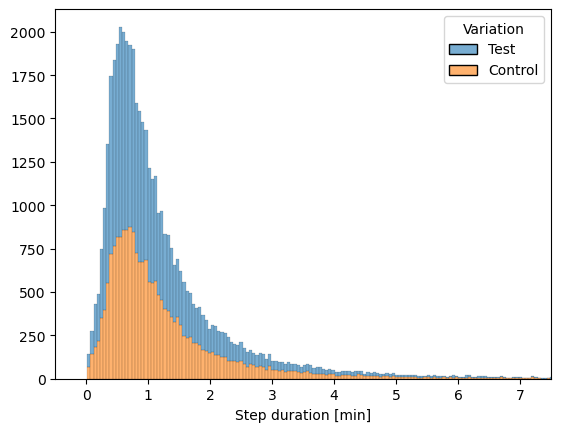

In [266]:
sns.histplot(x=df_filter_time['step_duration_minutes'], hue=df_filter_time['Variation'],alpha=0.6, multiple='stack')  
plt.xlim(-0.5, 7.5)
plt.xlabel('Step duration [min]')
plt.ylabel('')

(-0.1, 3.0)

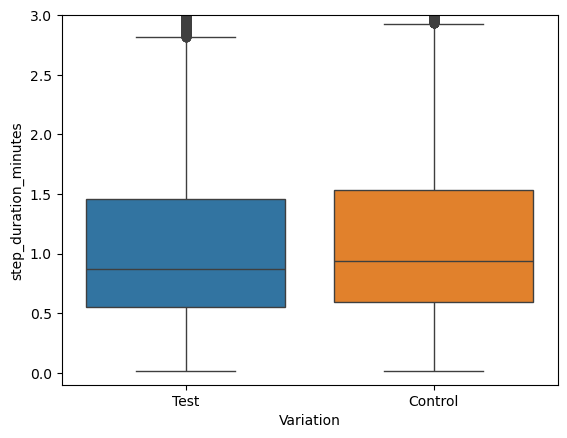

In [275]:
sns.boxplot(data = df_filter_time, x='Variation', y='step_duration_minutes', hue='Variation')
plt.ylim(-0.1,3)

Text(0.5, 1.0, 'Average step duration in function of clients age')

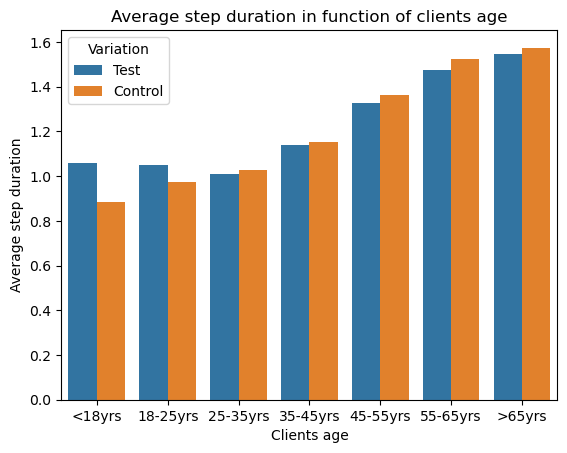

In [282]:
sns.barplot(x=df_filter_time['age_bin'], y=df_filter_time['step_duration_minutes'], hue=df_filter_time['Variation'], errorbar=None)  
plt.xlabel('Clients age')
plt.ylabel('Average step duration')
plt.title('Average step duration in function of clients age')

Text(0.5, 1.0, 'Average step duration in function of clients tenure years')

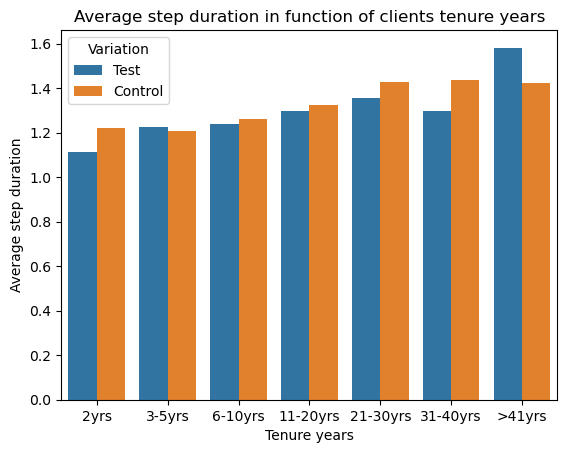

In [283]:
sns.barplot(x=df_filter_time['tenure_yr_bin'], y=df_filter_time['step_duration_minutes'], hue=df_filter_time['Variation'], errorbar=None)
plt.xlabel('Tenure years')
plt.ylabel('Average step duration')
plt.title('Average step duration in function of clients tenure years')

<Axes: xlabel='gendr', ylabel='step_duration_minutes'>

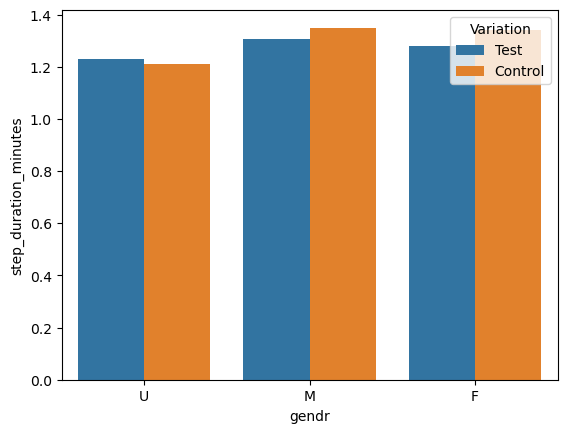

In [37]:
sns.barplot(x=df_filter_time['gendr'], y=df_filter_time['step_duration_minutes'], hue=df_filter_time['Variation'], errorbar=None)  

## How many times each step was taken


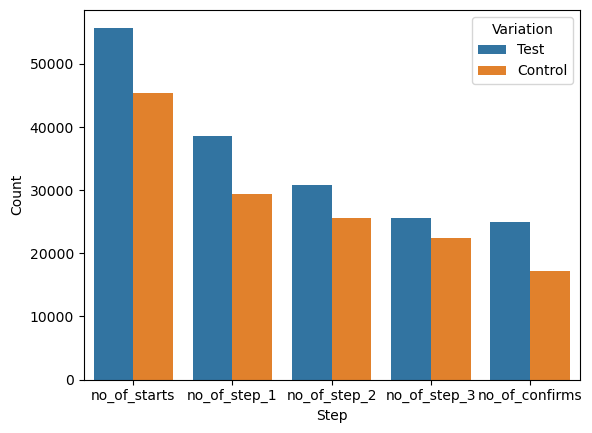

In [297]:
columns_to_sum = ['no_of_starts', 'no_of_step_1', 'no_of_step_2', 'no_of_step_3','no_of_confirms']

# Melt the DataFrame
melted_df = df.melt(id_vars=['Variation'], value_vars=columns_to_sum,
                    var_name='Step', value_name='Count')

# Sum the values for each Variation and Step combination
sum_df = melted_df.groupby(['Variation', 'Step']).sum().reset_index()

sum_df = sum_df.sort_values('Variation', ascending=False)

sns.barplot(data=sum_df, x='Step', y='Count', hue='Variation',  order=['no_of_starts', 'no_of_step_1', 'no_of_step_2', 'no_of_step_3','no_of_confirms'])

# Show the plot
plt.show()

In [296]:
sum_df.sort_values('Variation', ascending=False)

,Variation,Step,Count,Percentage
5,Test,no_of_confirms,24883.0,14.165595
6,Test,no_of_starts,55748.0,31.736670
7,Test,no_of_step_1,38569.0,21.956871
8,Test,no_of_step_2,30801.0,17.534641
9,Test,no_of_step_3,25657.0,14.606223
0,Control,no_of_confirms,17168.0,12.263208
1,Control,no_of_starts,45361.0,32.401640
2,Control,no_of_step_1,29435.0,21.025601
3,Control,no_of_step_2,25655.0,18.325524
4,Control,no_of_step_3,22377.0,15.984028


In [71]:
# Calculate the total number of steps in 'Test' and 'Control' groups
total_steps_test = sum_df[sum_df['Variation'] == 'Test']['Count'].sum()
total_steps_control = sum_df[sum_df['Variation'] == 'Control']['Count'].sum()

# Calculate the percentage directly within the melted DataFrame
sum_df['Percentage'] = sum_df.apply(lambda row: (row['Count'] / total_steps_test)*100
                                    if row['Variation'] == 'Test'
                                    else (row['Count'] / total_steps_control)*100, axis=1)

# 

In [78]:
df.groupby('Variation')['no_of_starts'].describe()

,count,mean,std,min,25%,50%,75%,max
Variation,,,,,,,,
Control,23526.0,1.928122,2.147162,0.0,1.0,1.0,2.0,47.0
Test,26959.0,2.067881,1.869210,0.0,1.0,1.0,3.0,54.0


In [81]:
df.groupby('Variation')['no_of_step_1'].describe()

,count,mean,std,min,25%,50%,75%,max
Variation,,,,,,,,
Control,23526.0,1.251169,1.025101,0.0,1.0,1.0,1.0,13.0
Test,26959.0,1.430654,1.186893,0.0,1.0,1.0,2.0,21.0


In [85]:
df.groupby('Variation')['no_of_step_2'].describe()

,count,mean,std,min,25%,50%,75%,max
Variation,,,,,,,,
Control,23526.0,1.090496,0.924351,0.0,1.0,1.0,1.0,18.0
Test,26959.0,1.142513,1.036511,0.0,1.0,1.0,1.0,24.0


In [86]:
df.groupby('Variation')['no_of_step_3'].describe()

,count,mean,std,min,25%,50%,75%,max
Variation,,,,,,,,
Control,23526.0,0.951160,0.825751,0.0,0.0,1.0,1.0,17.0
Test,26959.0,0.951704,0.817430,0.0,1.0,1.0,1.0,17.0


In [87]:
df.groupby('Variation')['no_of_confirms'].describe()

,count,mean,std,min,25%,50%,75%,max
Variation,,,,,,,,
Control,23526.0,0.729746,0.691522,0.0,0.0,1.0,1.0,15.0
Test,26959.0,0.922994,1.027086,0.0,0.0,1.0,1.0,19.0


In [88]:
#sum_df[sum_df['Variation'] == 'Test']['Percentage'].sum()
df[df['no_of_starts'] == 54]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,no_of_visits,is_confirmed,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms,step_duration_minutes,age_bin,tenure_yr_bin
43936,7597144,5.0,67.0,67.0,M,2.0,140305.91,5.0,8.0,Test,...,7,True,54.0,1.0,1.0,1.0,1,0.971895,>65yrs,3-5yrs


## Time filtering checks

In [41]:
#df[df['step_duration_minutes'] > 10].sort_values(by='step_duration_minutes', ascending=False).head(20)
#df[df['step_duration_minutes']==0].count()

In [42]:
df[(df['progress_count']==0) & (df['step_duration_minutes']==0)]['client_id'].count()

3916

In [43]:
df[(df['progress_count']==0) & (df['step_duration_minutes']>0) & (df['no_of_step_1']>0)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,no_of_visits,is_confirmed,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms,step_duration_minutes,age_bin,tenure_yr_bin
2893,9764903,5.0,70.0,34.0,U,2.0,37914.91,0.0,3.0,Control,...,1,False,1.0,1.0,0.0,0.0,0,0.016667,25-35yrs,3-5yrs
18572,9451034,7.0,90.0,63.0,U,2.0,700980.27,3.0,6.0,Test,...,1,False,1.0,1.0,0.0,0.0,0,1.450000,55-65yrs,6-10yrs


In [44]:
df[(df['step_duration_minutes']>20) & (df['had_progress']==0)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,no_of_visits,is_confirmed,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms,step_duration_minutes,age_bin,tenure_yr_bin
5562,938393,17.0,208.0,60.0,F,2.0,75019.81,1.0,4.0,Test,...,1,False,2.0,0.0,0.0,0.0,0,21.466667,55-65yrs,11-20yrs
6660,9468174,14.0,173.0,74.0,F,2.0,31790.75,3.0,6.0,Control,...,1,False,3.0,0.0,0.0,0.0,0,27.808333,>65yrs,11-20yrs
9745,5844424,21.0,254.0,82.0,F,2.0,28526.58,0.0,4.0,Control,...,1,False,2.0,0.0,0.0,0.0,0,23.683333,>65yrs,21-30yrs
12537,7537182,14.0,178.0,34.0,F,2.0,68026.11,0.0,3.0,Test,...,1,False,2.0,0.0,0.0,0.0,0,27.550000,25-35yrs,11-20yrs
13894,3826133,5.0,70.0,26.0,U,2.0,56168.82,3.0,6.0,Test,...,1,False,2.0,0.0,0.0,0.0,0,44.066667,25-35yrs,3-5yrs
16423,2820408,4.0,59.0,33.0,U,2.0,30770.40,0.0,3.0,Test,...,1,False,2.0,0.0,0.0,0.0,0,23.950000,25-35yrs,3-5yrs
17493,702591,22.0,271.0,47.0,F,2.0,50290.69,2.0,5.0,Control,...,1,False,2.0,0.0,0.0,0.0,0,30.450000,45-55yrs,21-30yrs
18496,7183287,26.0,323.0,44.0,F,2.0,94064.34,0.0,3.0,Control,...,2,False,3.0,0.0,0.0,0.0,0,32.350000,35-45yrs,21-30yrs
25276,246922,9.0,119.0,68.0,F,2.0,90480.75,3.0,6.0,Test,...,1,False,2.0,0.0,0.0,0.0,0,41.083333,>65yrs,6-10yrs
25468,8912315,23.0,284.0,68.0,F,4.0,769124.40,6.0,9.0,Control,...,2,True,0.0,0.0,0.0,0.0,0,28.150000,>65yrs,21-30yrs


In [45]:
df[(df['step_duration_minutes']>20) & (df['had_progress']>0)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,no_of_visits,is_confirmed,no_of_starts,no_of_step_1,no_of_step_2,no_of_step_3,no_of_confirms,step_duration_minutes,age_bin,tenure_yr_bin
6413,9971962,15.0,191.0,47.5,F,2.0,29331.33,1.0,4.0,Test,...,1,True,2.0,2.0,9.0,1.0,1,21.446429,45-55yrs,11-20yrs
6978,2283351,11.0,143.0,48.5,M,2.0,65203.20,0.0,3.0,Control,...,2,True,5.0,2.0,1.0,1.0,1,20.229167,45-55yrs,11-20yrs
21136,7353047,14.0,169.0,71.0,M,2.0,352862.33,0.0,3.0,Control,...,1,False,2.0,1.0,0.0,0.0,0,29.658333,>65yrs,11-20yrs
22550,2148617,19.0,232.0,69.0,M,2.0,210572.67,6.0,9.0,Control,...,3,False,5.0,1.0,1.0,0.0,0,21.670833,>65yrs,11-20yrs
22609,4647786,11.0,142.0,29.5,F,3.0,50662.24,1.0,4.0,Test,...,1,True,2.0,2.0,1.0,1.0,4,31.298148,25-35yrs,11-20yrs
29565,2882702,20.0,250.0,44.0,F,2.0,35326.46,0.0,3.0,Control,...,1,True,1.0,1.0,1.0,1.0,2,31.900000,35-45yrs,11-20yrs
29661,3257276,12.0,145.0,70.0,U,3.0,428105.13,1.0,4.0,Control,...,1,False,2.0,2.0,0.0,0.0,0,22.083333,>65yrs,11-20yrs
30188,9553121,7.0,94.0,42.0,U,2.0,61018.52,5.0,9.0,Control,...,1,False,4.0,2.0,1.0,0.0,0,63.597222,35-45yrs,6-10yrs
30523,2182225,5.0,66.0,48.5,U,2.0,326330.14,1.0,4.0,Control,...,2,True,8.0,2.0,3.0,2.0,1,50.117857,45-55yrs,3-5yrs
32334,3534206,4.0,59.0,32.0,U,3.0,51768.22,6.0,9.0,Test,...,2,False,3.0,1.0,1.0,0.0,0,20.411111,25-35yrs,3-5yrs


In [46]:
#df[df['step_duration_minutes']==0]['no_of_starts'].value_counts()

In [47]:
#df[df['step_duration_minutes']==0]['no_of_step_1'].value_counts()

In [48]:
#df[df['step_duration_minutes']==0]['no_of_step_2'].value_counts()

In [49]:
#df[df['step_duration_minutes']==0]['no_of_step_3'].value_counts()

In [50]:
#df[df['step_duration_minutes']==0]['no_of_confirms'].value_counts()

<Axes: xlabel='step_duration_minutes', ylabel='Count'>

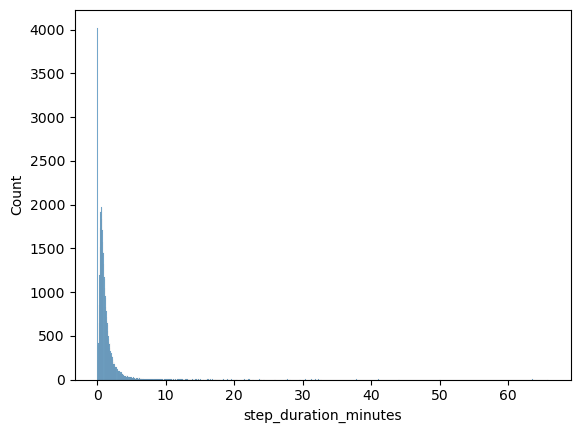

In [51]:
#sns.histplot(data=df[['Variation','step_duration']], x='step_duration', bins=5, alpha=0.6)

sns.histplot(x=df['step_duration_minutes'], alpha=0.6)  

#sns.histplot(x=df['step_duration'].astype('timedelta64[s]'), alpha=0.6)  
# #plt.xlim(-1,10)

<Axes: xlabel='Variation', ylabel='step_duration_minutes'>

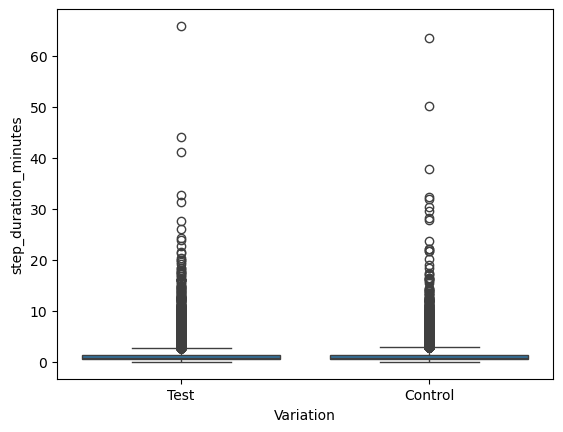

In [52]:
sns.boxplot(data = df, x='Variation', y='step_duration_minutes')

<Axes: xlabel='age_bin', ylabel='step_duration_minutes'>

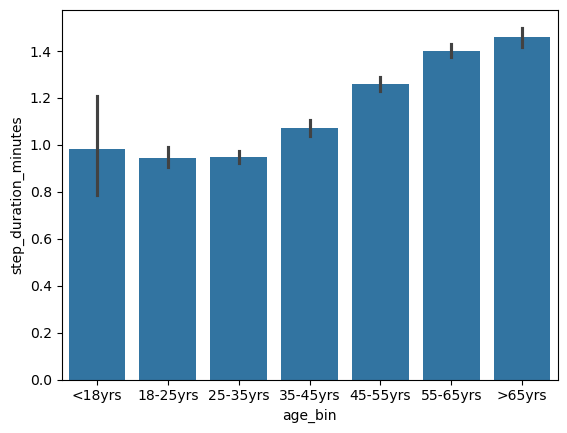

In [53]:
sns.barplot(x=df['age_bin'], y=df['step_duration_minutes'])  

In [54]:
df['step_duration_minutes'].describe()

count    50485.000000
mean         1.202012
std          1.538467
min          0.000000
25%          0.494444
50%          0.833333
75%          1.419444
max         65.883333
Name: step_duration_minutes, dtype: float64

In [56]:
df[df['avg_step_duration'] > '0 days 00:01:25.100000000']['age_bin'].value_counts()

age_bin
55-65yrs    3543
45-55yrs    2726
>65yrs      2543
35-45yrs    1667
25-35yrs    1611
18-25yrs     529
<18yrs        10
Name: count, dtype: int64

In [57]:
df[df['step_duration_minutes'] > 1]['age_bin'].value_counts()

age_bin
55-65yrs    5411
45-55yrs    4434
>65yrs      3796
25-35yrs    2953
35-45yrs    2918
18-25yrs     917
<18yrs        19
Name: count, dtype: int64

## Hypothesis Testing : is new interface better ?


In [306]:
from statsmodels.stats.proportion import proportions_ztest

# df = client_stats_ab
confirmed_c = df[df['Variation'] == 'Control']['is_confirmed'].sum()
confirmed_t = df[df['Variation'] == 'Test']['is_confirmed'].sum()
nobs_c = df[df['Variation'] == 'Control']['is_confirmed'].count()
nobs_t = df[df['Variation'] == 'Test']['is_confirmed'].count()


print('Control and Test Means', df[df['Variation'] == 'Control']['is_confirmed'].mean(), df[df['Variation'] == 'Test']['is_confirmed'].mean())
print()

# our our control and test group proportions statistically significally different
print('## Is the difference in the confirmation rates statistically significant? ##')

result = proportions_ztest([confirmed_c, confirmed_t], [nobs_c, nobs_t], alternative='two-sided')

print('P-Value for proportial z-test between control and test group: ', result[1])
print('- We reject the null hypothesis (confirmation rates are the same)')
print('- and have high confidence the difference in completion rates between the groups are significantly different')
print()

p_hat = df[df['Variation'] == 'Test']['is_confirmed'].mean()
p_0 = df[df['Variation'] == 'Control']['is_confirmed'].mean() * 1.05
p_0b = df[df['Variation'] == 'Control']['is_confirmed'].mean() 

print('## Are we confident the test group has a completion rate 5% better than the control? ##')

result = proportions_ztest(confirmed_t, nobs_t, value=p_0, alternative='larger')

print('P-Value for greater proportial z-test vs control mean * 1.05: ', result[1])
print('- We can not reject the null hypothesis (test confirmation rate is 5% higher)')
print('- not confident we will see a 5% lift should we implement the changes')

Control and Test Means 0.6557850888378814 0.6929782261953337

## Is the difference in the confirmation rates statistically significant? ##
P-Value for proportial z-test between control and test group:  5.334173702774177e-19
- We reject the null hypothesis (confirmation rates are the same)
- and have high confidence the difference in completion rates between the groups are significantly different

## Are we confident the test group has a completion rate 5% better than the control? ##
P-Value for greater proportial z-test vs control mean * 1.05:  0.05848387780816889
- We can not reject the null hypothesis (test confirmation rate is 5% higher)
- not confident we will see a 5% lift should we implement the changes


In [307]:
from scipy.stats import ttest_1samp, binomtest
x = df[df['Variation'] == 'Test']['is_confirmed'].map({True:1, False:0})
st, p = ttest_1samp(x, p_0)
st, p, p/2

(1.5675998590576463, 0.11698628211235765, 0.058493141056178824)